<a href="https://colab.research.google.com/github/alexkardan/Data110/blob/main/Week_10_classwork_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
pump_df=pd.read_csv('https://raw.githubusercontent.com/alexkardan/Data110-Dataset/refs/heads/main/dataset/pumps.csv')
death_df=pd.read_csv('https://raw.githubusercontent.com/alexkardan/Data110-Dataset/refs/heads/main/dataset/deaths.csv')

In [89]:
pump_df.head()

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


In [90]:
death_df.head()

,X,Y
0,13.588010,11.095600
1,9.878124,12.559180
2,14.653980,10.180440
3,15.220570,9.993003
4,13.162650,12.963190


In [91]:
pump_df.sample(5)

,X,Y
3,14.879830,17.809919
11,16.005110,5.046838
8,13.521460,7.958250
2,13.378190,17.394541
0,8.651201,17.891600


In [92]:
len(pump_df)

13

In [93]:
len(death_df)

578

In [94]:
pump_df.shape

(13, 2)

In [95]:
pump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       13 non-null     float64
 1   Y       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [96]:
pump_df.describe()

,X,Y
count,13.000000,13.000000
mean,12.504677,11.963446
std,3.376869,4.957821
min,8.651201,5.046838
25%,8.999440,7.958250
50%,12.571360,11.727170
75%,14.879830,17.394541
max,18.914391,18.517851


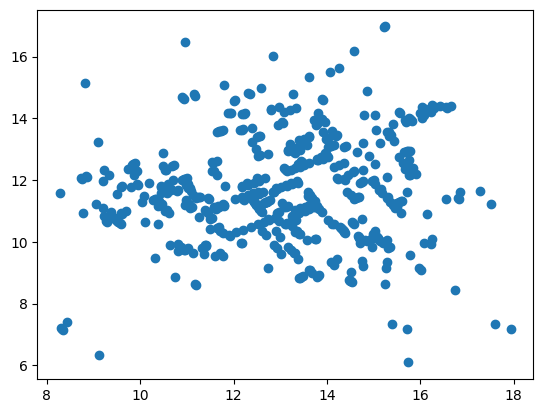

In [97]:
plt.scatter(death_df['X'],death_df['Y'])

<Axes: xlabel='X', ylabel='Y'>

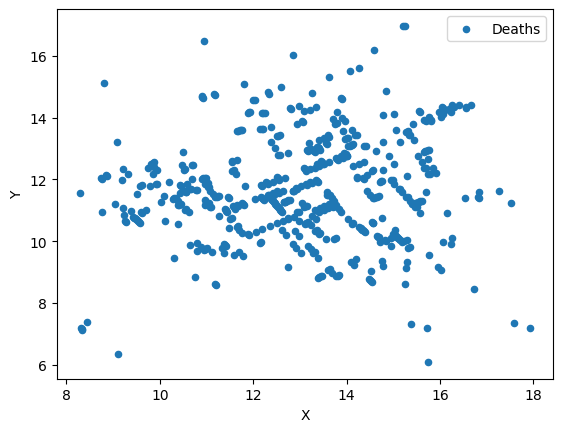

In [98]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths')

<Axes: xlabel='X', ylabel='Y'>

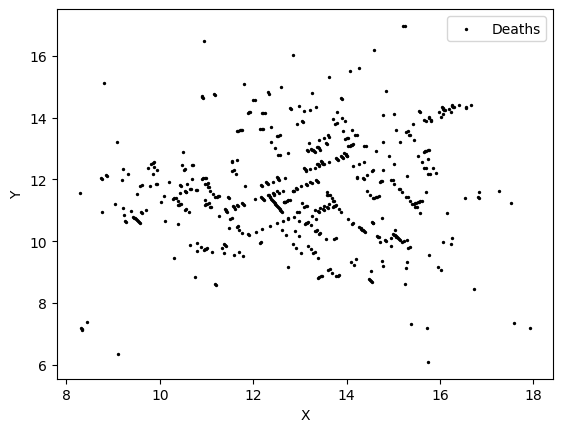

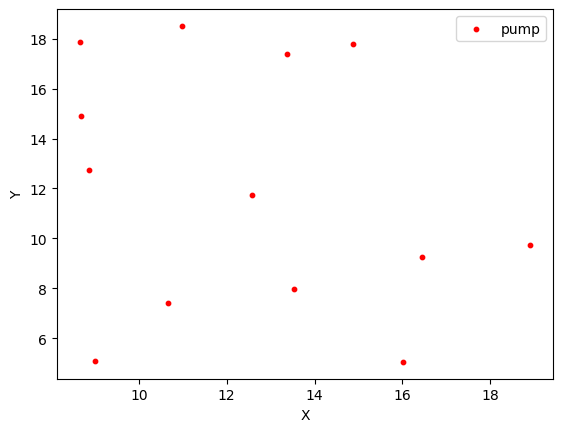

In [99]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths', s=2, c='black')
pump_df.plot(x='X', y='Y', kind='scatter', label='pump', s=10, c='red')

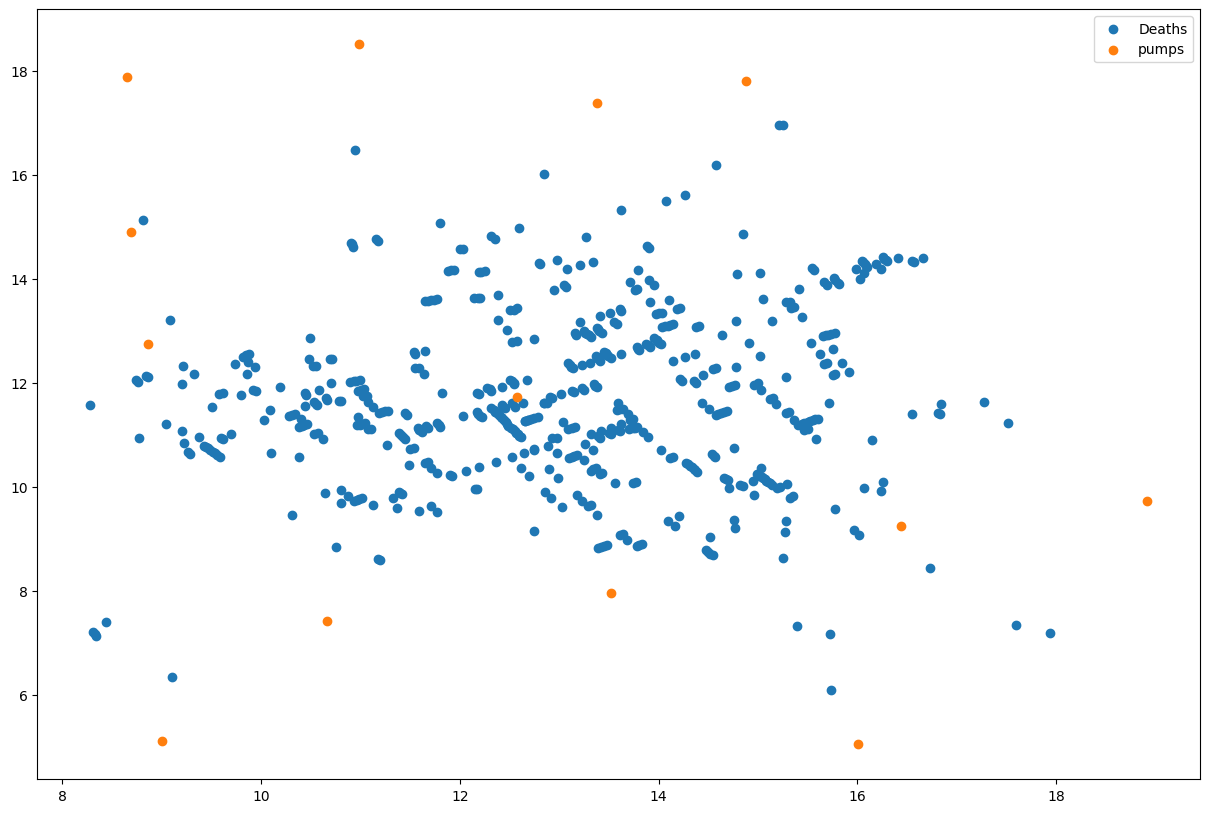

In [100]:
plt.figure(figsize=(15,10))
plt.scatter(death_df['X'],death_df['Y'],label='Deaths')
plt.scatter(pump_df['X'],pump_df['Y'],label='pumps')
plt.legend()
plt.show()

In [101]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [102]:
points=pump_df.values
points

array([[ 8.6512012, 17.8915997],
       [10.9847803, 18.5178509],
       [13.37819  , 17.3945408],
       [14.8798304, 17.8099194],
       [ 8.694768 , 14.9054699],
       [ 8.8644161, 12.75354  ],
       [12.5713596, 11.72717  ],
       [10.6609697,  7.428647 ],
       [13.5214596,  7.95825  ],
       [16.4348907,  9.2521296],
       [18.9143906,  9.7378187],
       [16.0051098,  5.0468378],
       [ 8.9994402,  5.1010232]])

<Figure size 1500x1200 with 0 Axes>

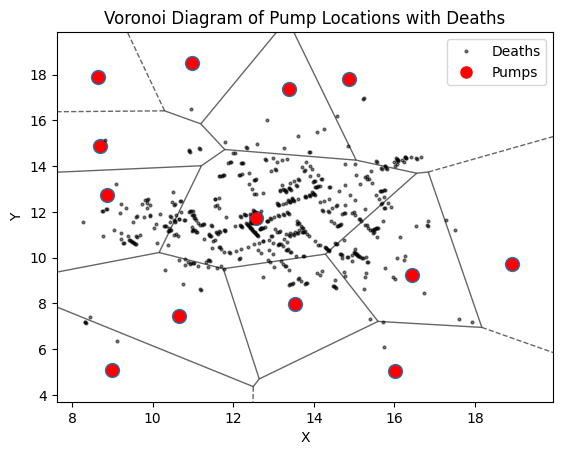

In [103]:
vor = Voronoi(points)

plt.figure(figsize=(15,12))
voronoi_plot_2d(vor, show_vertices=False, line_colors='k', line_width=1, line_alpha=0.6, point_size=20, point_color='red')
plt.plot(death_df['X'], death_df['Y'], 'o', markersize=2, color='black', alpha=0.5, label='Deaths')
plt.plot(pump_df['X'], pump_df['Y'], 'o', markersize=8, color='red', label ='Pumps')
plt.title("Voronoi Diagram of Pump Locations with Deaths")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.savefig('voronoi.png')
plt.show()

In [104]:
import folium
from folium.plugins import HeatMap

In [105]:
df = pd.read_csv('BPD_Arrests.csv')
ds=pd.read_csv('Liquor_Licenses_BC.csv')

In [106]:
df.head()

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,IncidentOffence,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation
0,1413637.947,597194.1516,1,23L09552,23192623.0,16.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.642,"(39.3059,-76.642)"
1,1413637.947,597194.1516,2,23L09552,23192626.0,21.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.642,"(39.3059,-76.642)"
2,1413637.947,597194.1516,3,23L09552,24000002.0,18.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.642,"(39.3059,-76.642)"
3,1413637.947,597194.1516,4,23L09552,24000010.0,19.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 5285,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.642,"(39.3059,-76.642)"
4,NaN,NaN,5,NaN,23192609.0,41.0,F,B,2023/12/31 20:35:00+00,NaN,Unknown Offense,NaN,1 1415,ASSAULT-SEC DEGREE,NaN,NaN,NaN,NaN,NaN,"(,)"


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377824 entries, 0 to 377823
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  227117 non-null  float64
 1   Y                  227117 non-null  float64
 2   RowID              377824 non-null  int64  
 3   IncidentNumber     230349 non-null  object 
 4   ArrestNumber       360643 non-null  float64
 5   Age                377692 non-null  float64
 6   Gender             377790 non-null  object 
 7   Race               377730 non-null  object 
 8   ArrestDateTime     377824 non-null  object 
 9   ArrestLocation     233192 non-null  object 
 10  IncidentOffence    377824 non-null  object 
 11  IncidentLocation   233192 non-null  object 
 12  Charge             328571 non-null  object 
 13  ChargeDescription  377824 non-null  object 
 14  District           219039 non-null  object 
 15  Post               219039 non-null  float64
 16  Ne

In [108]:
cleaned_df = df.dropna(subset=['Latitude', 'Longitude'])

In [109]:
cleaned_df.head()

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,IncidentOffence,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation
0,1413637.947,597194.1516,1,23L09552,23192623.0,16.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.6420,"(39.3059,-76.642)"
1,1413637.947,597194.1516,2,23L09552,23192626.0,21.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.6420,"(39.3059,-76.642)"
2,1413637.947,597194.1516,3,23L09552,24000002.0,18.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 1106,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.6420,"(39.3059,-76.642)"
3,1413637.947,597194.1516,4,23L09552,24000010.0,19.0,M,B,2023/12/31 21:00:00+00,1500 SCHOOL ST,Unknown Offense,1500 SCHOOL ST,1 5285,HGV,Western,711.0,Sandtown-Winchester,39.3059,-76.6420,"(39.3059,-76.642)"
8,1411742.753,589647.1052,9,23L09538,23192606.0,20.0,M,B,2023/12/31 18:53:00+00,2000 PRATT ST,Unknown Offense,2000 PRATT ST,1 1785,HGV,Southwest,832.0,Carrollton Ridge,39.2852,-76.6488,"(39.2852,-76.6488)"


In [111]:
# Create a base map centered around Baltimore, Maryland
map_center = [39.2904, -76.6122]  # Center of Baltimore
m = folium.Map(location=map_center, zoom_start=11)
heat_map=cleaned_df[['Latitude', 'Longitude']].values
HeatMap(heat_map).add_to(m)
map_path='arrest.html'
m.save(map_path)
map_path

'arrest.html'